**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Fernando Abel Leal Villacicencio
*   MATRÍCULA: A01796859

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [58]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [59]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [60]:
Var = response_df.select_dtypes(include='object').columns
print('Varibles de Texto:' , Var.size)
Var = response_df.select_dtypes(include='number').columns
print('Varibles Numericas:' , Var.size)

Varibles de Texto: 11
Varibles Numericas: 139


In [61]:
response_df.select_dtypes(include='object').describe().T 

,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


In [62]:
response_df.select_dtypes(include='number').describe().T 

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.557540,1.093750,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.514141,10.024505,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.405051,13.839561,41.0,55.0,64.0,75.0,165.0


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


De acuerdo a la escala de medición la variable Peso (Height) se clasificaría como cuantitativo continuo ya que pueden existir valores intermedios. De acuerdo a esta clasificación un gráfico boxplot o histograma definirían perfectamente el comportamiento de dicha variable.

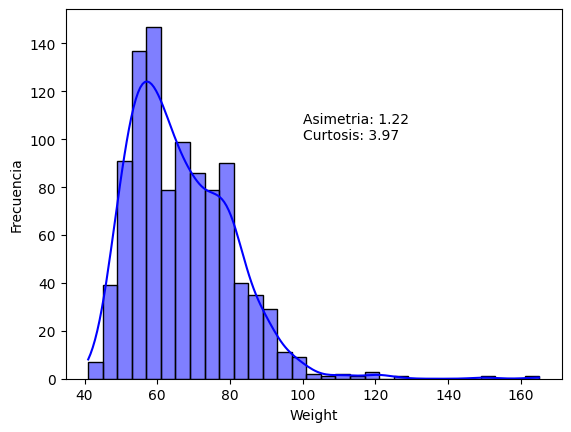

In [63]:
sns.histplot(response_df['Weight'], kde =True, color='blue')
plt.ylabel('Frecuencia')

a=response_df['Weight'].skew()
c= response_df['Weight'].kurt()
plt.text(100, 100, f'Asimetria: {round(a,2)}\nCurtosis: {round(c,2)}')


plt.show()

Dado que el peso es una variable continua que varía dentro de un rango definido, un histograma es la mejor opción, ya que agrupa los valores en intervalos.

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [64]:
round(response_df['Weight'].skew(),2)

1.22

 La asimetría muestra un valor positivo, lo que indica que la distribución de los valores atípicos tiende a ser mayor que la mayoría de los datos, extendiendo la distribución hacia la derecha.

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [65]:
faltantes = response_df['Weight'].isna().sum()
mean = response_df['Weight'].isna().mean()*100

print(f'Faltantes: {faltantes} - Porcentaje: {round(mean,2)}%')

Faltantes: 20 - Porcentaje: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [66]:
from scipy.stats import ttest_ind

def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1,)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


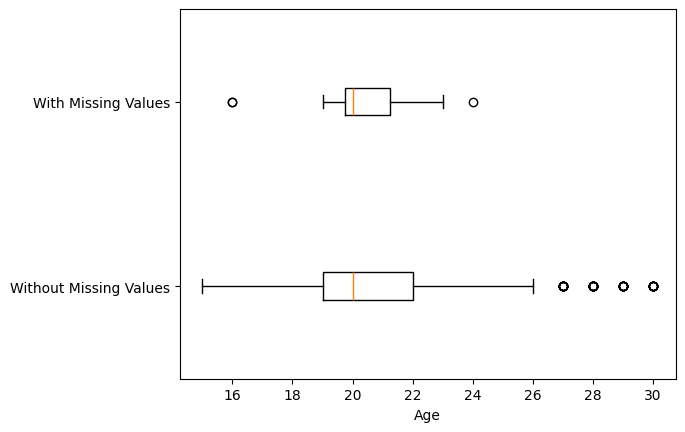

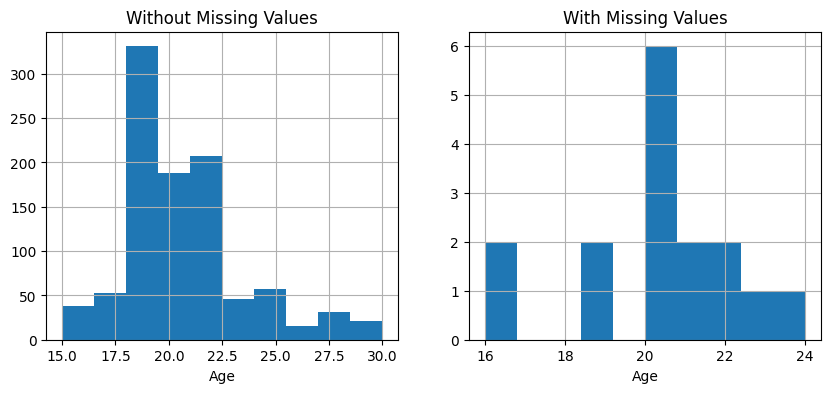

p-value of t-test: 0.7258243979822129
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Number of siblings:


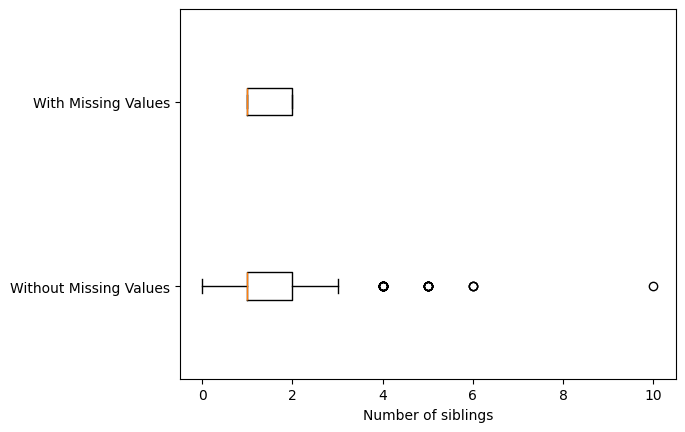

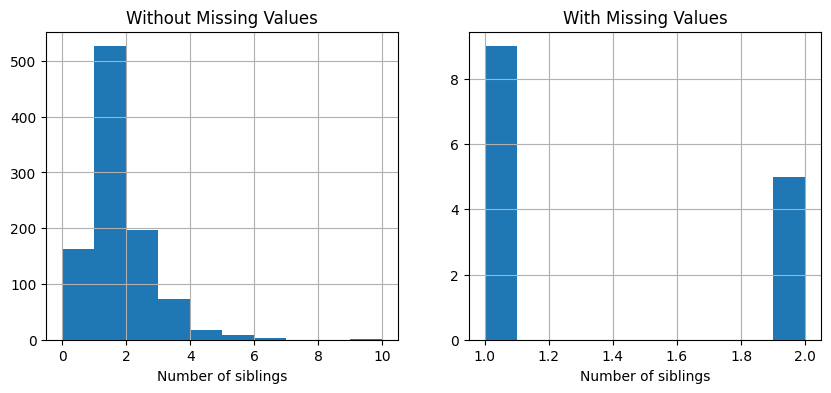

p-value of t-test: 0.8255092107556896
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [67]:
numerical_attributes = ['Age','Number of siblings']

BM_MV = response_df.Weight.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Prueba de Hipótesis variable `Age`.

    •	Hipótesis Nula seria que la edad no tiene una diferencia significativa entre los grupos con y sin valores faltantes en Weight.
    •	Hipótesis Alternativa se define como la edad sí tiene una diferencia significativa entre los grupos con y sin valores faltantes en Weight.

Debido a que el resultado de p-value es 0.7258 y es mayor a 0.05 indica que no hay evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que los valores faltantes en Weight no tienen una relación significativa con Age.

### Prueba de Hipótesis variable `Number of siblings`.

    •	Hipótesis Nula seria que el numero de hermanos no tiene una diferencia significativa entre los grupos con y sin valores faltantes en Weight.
    •	Hipótesis Alternativa se define como el numero de hermanos sí tiene una diferencia significativa entre los grupos con y sin valores faltantes en Weight.
    
Debido a que el resultado de p-value es 0.8255 y es mayor a 0.05, esto sugiere que los valores faltantes en Weight no tienen una relación significativa con el numero de hermanos.

In [68]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Gender:


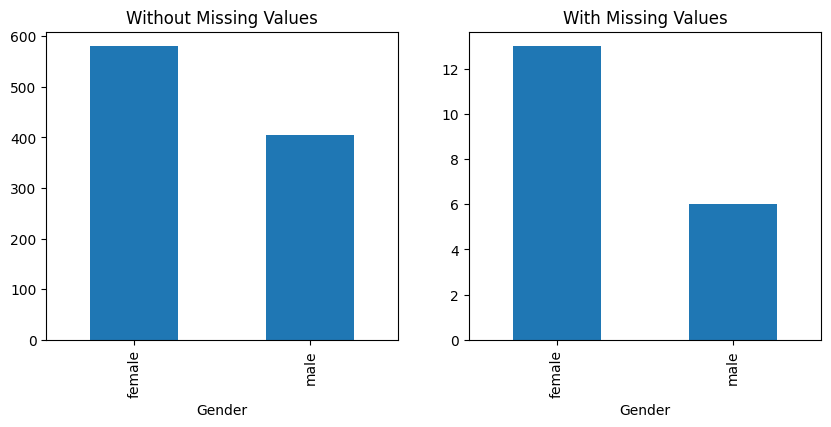

p-value of Chi_squared test: 0.5472167199163878
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Education:


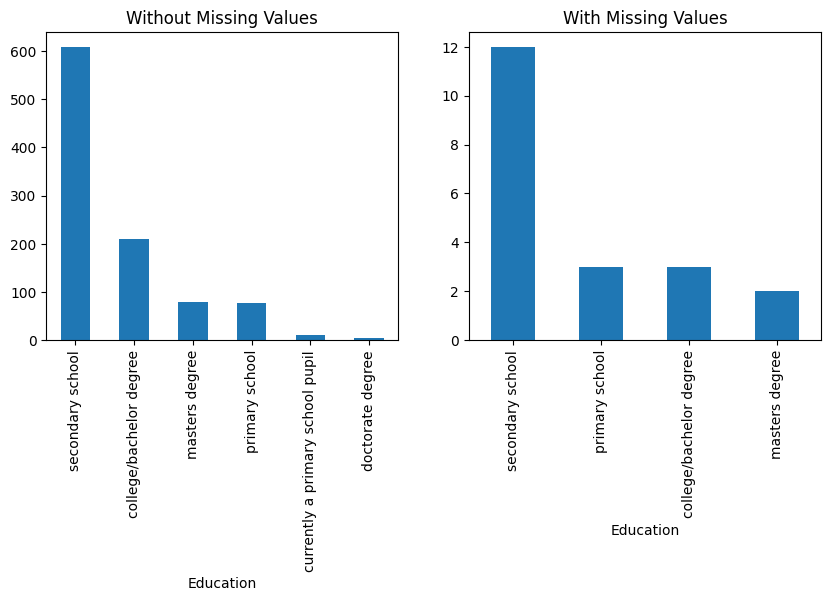

p-value of Chi_squared test: 0.8424822989541867
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [69]:
categorical_attributes = ['Gender', 'Education']

BM_MV = response_df.Weight.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(response_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Prueba de Hipótesis variable `Gender`.
Dado que el valor p-value es 0.547, indica que no hay evidencia suficiente para concluir que el género influye en la presencia de los valores faltantes en Weight. 

### Prueba de Hipótesis variable `Education`.
Con un valor p-value de 0.842, sugiere que no hay una relación significativa entre los valores faltantes en Weight y la variable categórica.

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [70]:
response_df["Weight"] = response_df["Weight"].fillna(response_df["Weight"].median())
response_df.Weight.isna().value_counts()

Weight
False    1010
Name: count, dtype: int64

La media es muy sensible a los valores atípicos, especialmente cuando estos se concentran en la cola derecha de la distribución, lo que provoca que la media se desplace hacia valores más altos y no refleje adecuadamente el "centro" de los datos.

Por otro lado, la mediana es la opción más adecuada para estos datos, ya que los valores presentan una distribución sesgada. La mediana proporciona una imputación más confiable en estos casos, dado que no se ve afectada por los valores extremos o atípicos, representando de manera más robusta la tendencia central de los datos.

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

<Axes: >

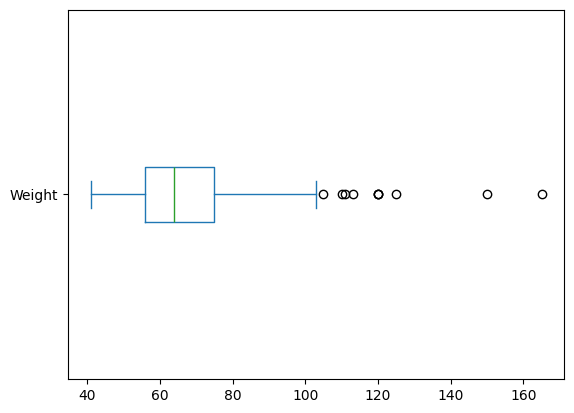

In [71]:
response_df['Weight'].plot.box(vert=False)

In [72]:
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
IQR_outliers = response_df[(response_df["Weight"] < limite_inferior) | (response_df["Weight"] > limite_superior)]
print(f"Número de valores atípicos: {IQR_outliers.shape[0]}")

Número de valores atípicos: 10


<Axes: >

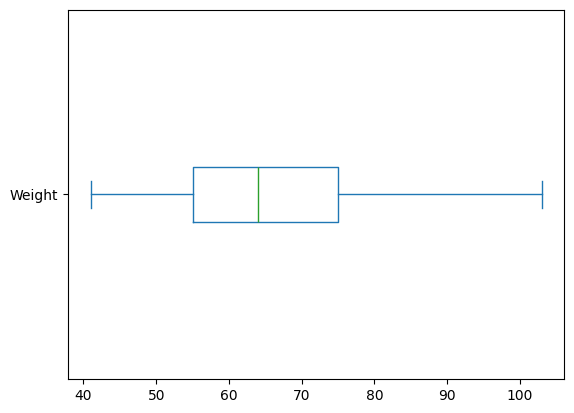

In [73]:
response_df = response_df[(response_df['Weight'] >= limite_inferior) & (response_df['Weight'] <= limite_superior)]
response_df['Weight'].plot.box(vert=False)

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

<Axes: >

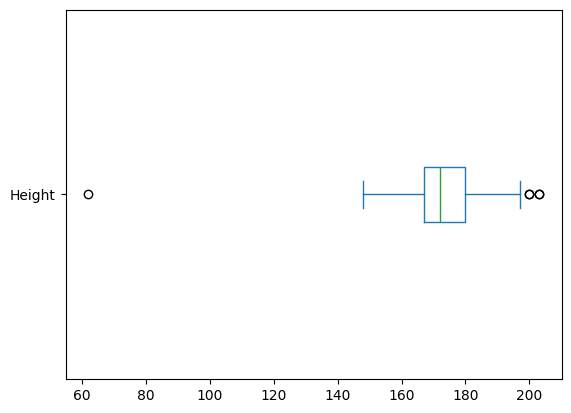

In [74]:
response_df['Height'].plot.box(vert=False)

In [75]:
Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
IQR_outliers = response_df[(response_df["Height"] < limite_inferior) | (response_df["Height"] > limite_superior)]
print(f"Número de valores atípicos: {IQR_outliers.shape[0]}")

Número de valores atípicos: 5


<Axes: >

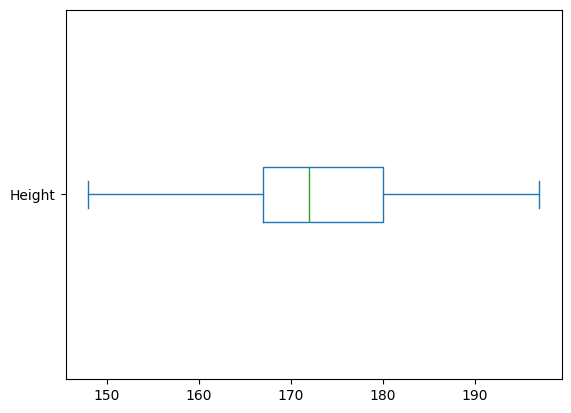

In [76]:
response_df = response_df[(response_df['Height'] >= limite_inferior) & (response_df['Height'] <= limite_superior)]
response_df['Height'].plot.box(vert=False)

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [77]:
Altura=response_df['Height']/100

BMI = response_df['Weight'] / (Altura ** 2)
BMI

0       18.066167
1       21.829952
2       21.629649
3       19.943213
4       20.415225
          ...    
1005    21.192742
1006    23.888441
1007    25.059307
1008    19.379197
1009    21.037253
Length: 976, dtype: float64

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

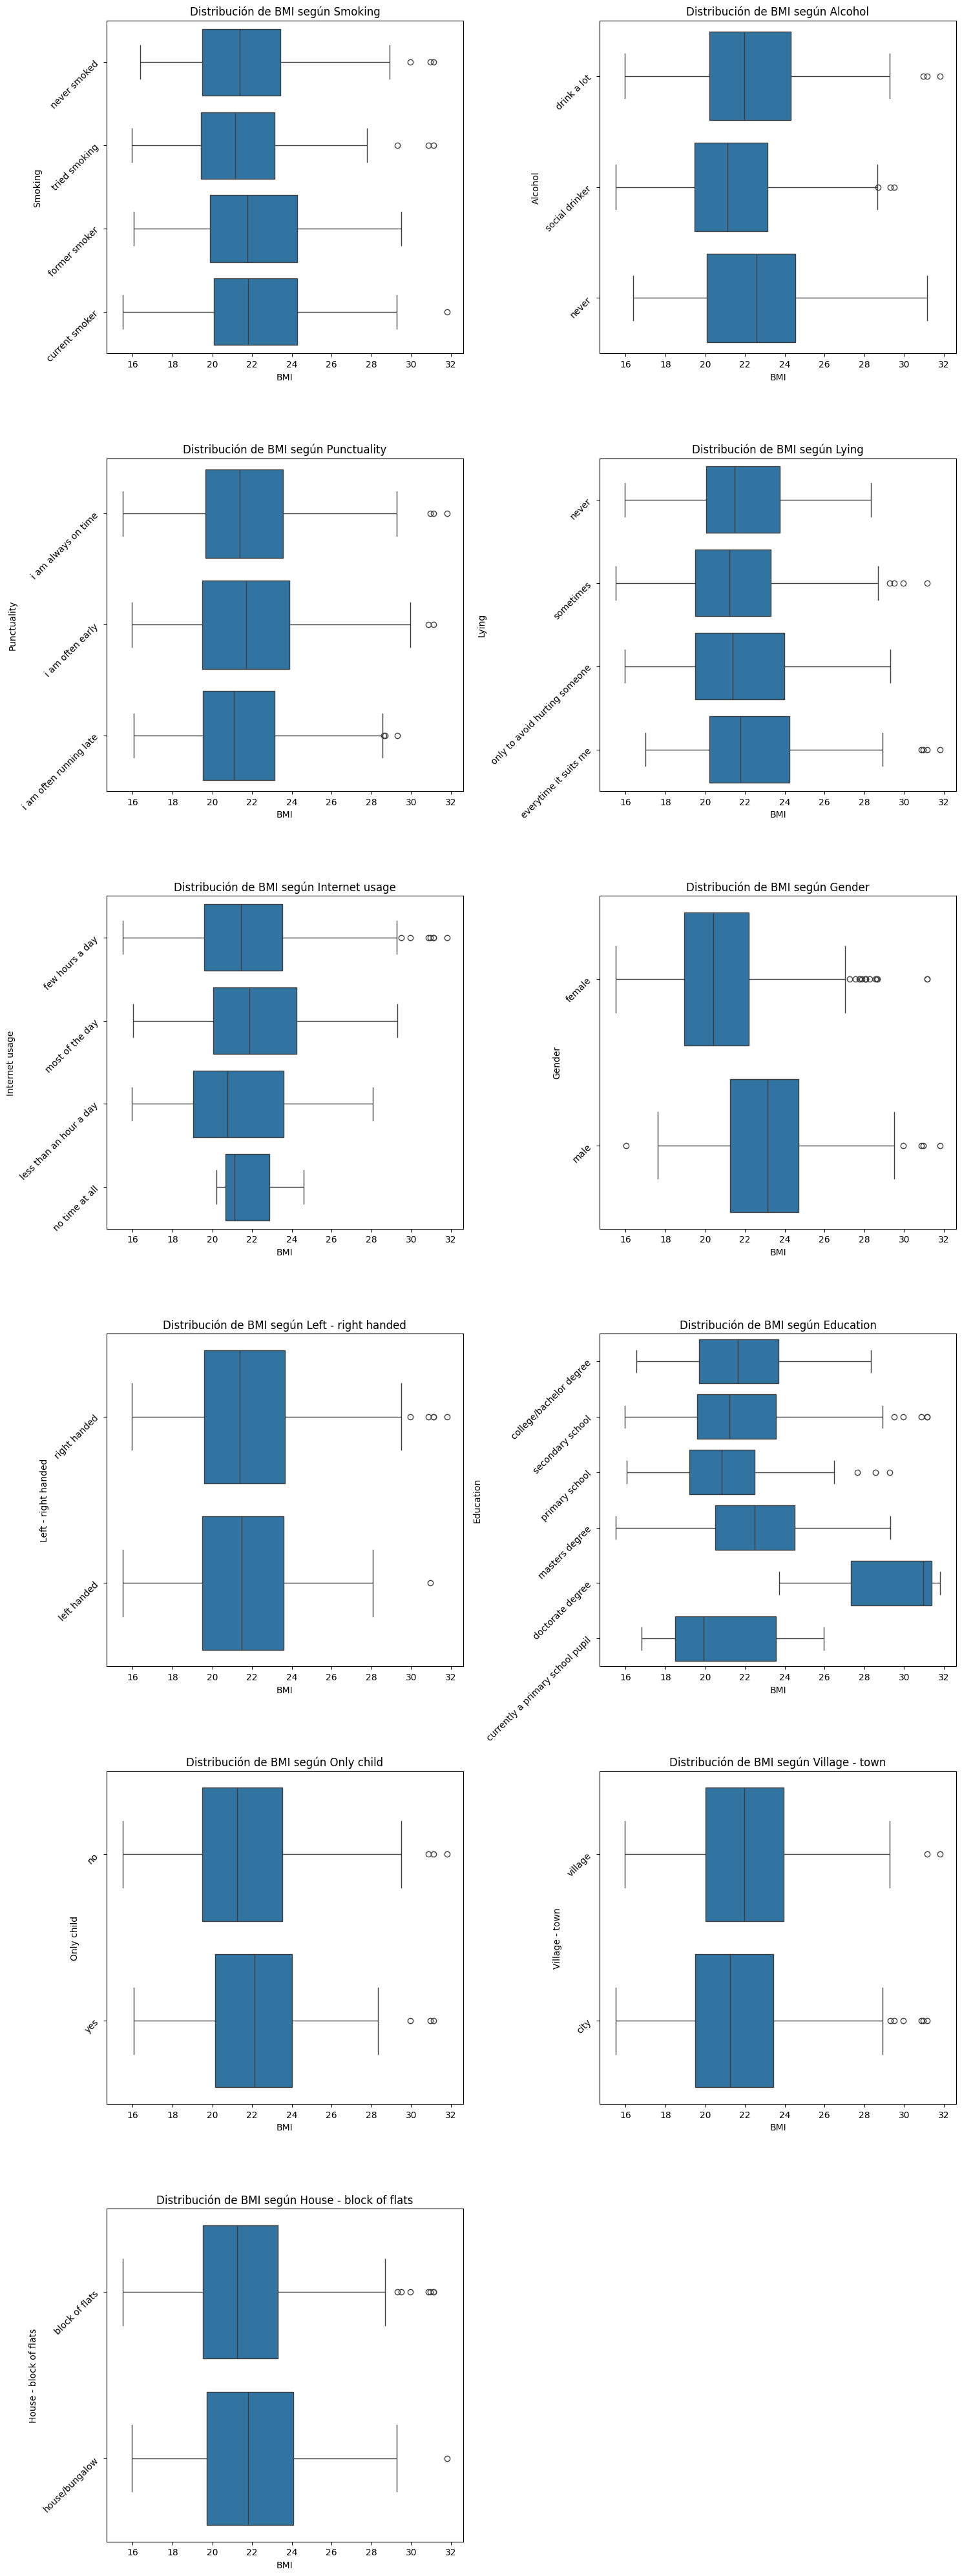

In [78]:
categorical_attributes = response_df.select_dtypes(include='object').columns
response_df['BMI'] = BMI
# Configuración del tamaño de la figura
plt.figure(figsize=(15, 40))

# Generar un boxplot por cada variable categórica
for i, cat in enumerate(categorical_attributes, 1):
    plt.subplot(len(categorical_attributes) // 2 + 1, 2, i)
    sns.boxplot(x=response_df["BMI"], y=response_df[cat])
    plt.yticks(rotation=45) 
    plt.title(f'Distribución de BMI según {cat}')

plt.tight_layout()
plt.show()


Se puede observar que los valores del índice de masa corporal (`BMI`) en la mayoría de los gráficos siguen un comportamiento similar, manteniéndose generalmente entre 20 y 24 sin importar el tipo de variable analizada. Sin embargo, esta tendencia cambia significativamente al considerar el nivel de estudios y el género de las personas, donde se observa una relación más marcada.

En cuanto al nivel de estudios, se aprecia un aumento considerable del `BMI` en personas con estudios de doctorado en comparación con otros niveles educativos.

Por otro lado, al analizar el género, se observa que los hombres tienden a presentar un `BMI` más alto que las mujeres.